<a href="https://colab.research.google.com/github/WattEfird4/WattEfird4.github.io/blob/master/usl_clustering_kmeans_hierarchal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project8/stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
#checking the shape of the dataset
df.shape

(340, 15)

In [ ]:
#viewing first rows of dataset
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
#viewing last rows of dataset
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [ ]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 340 rows and 15 columns


In [ ]:
#checking data by choosing 10 random samples
df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [ ]:
#checking datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
data = df.copy()

In [ ]:
#checking the summary statistics of the numeric data
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [ ]:
#checking the summary statistics of the object type data
data.describe(exclude=np.number).T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


In [ ]:
#checking for missing values
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
#duplicate value check
data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="sienna"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, color="teal"
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Dark2",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

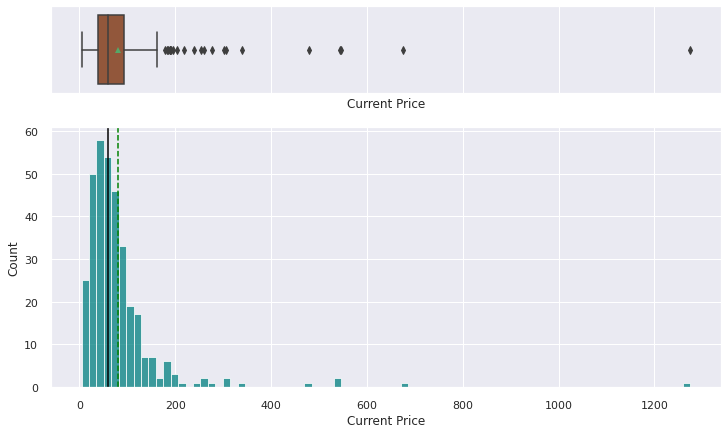

In [ ]:
histogram_boxplot(df, "Current Price")

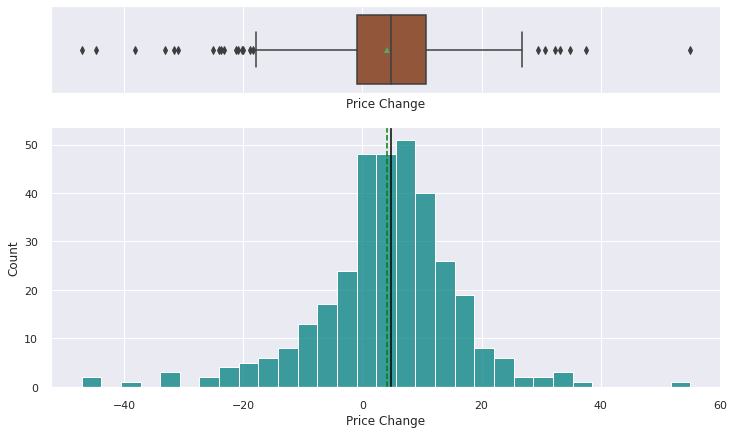

In [ ]:
histogram_boxplot(df, "Price Change")

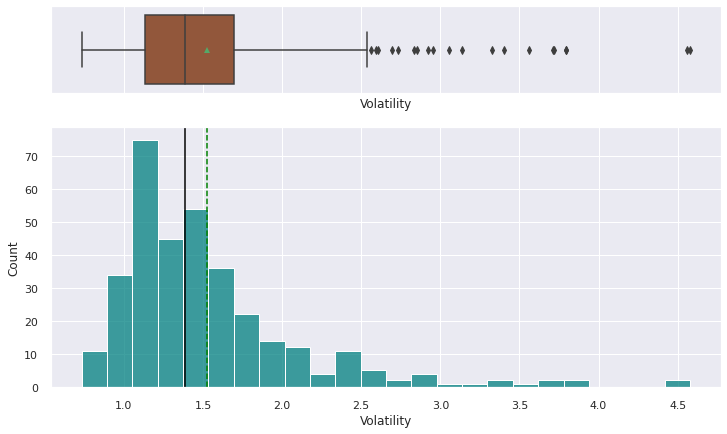

In [ ]:
histogram_boxplot(df, "Volatility")

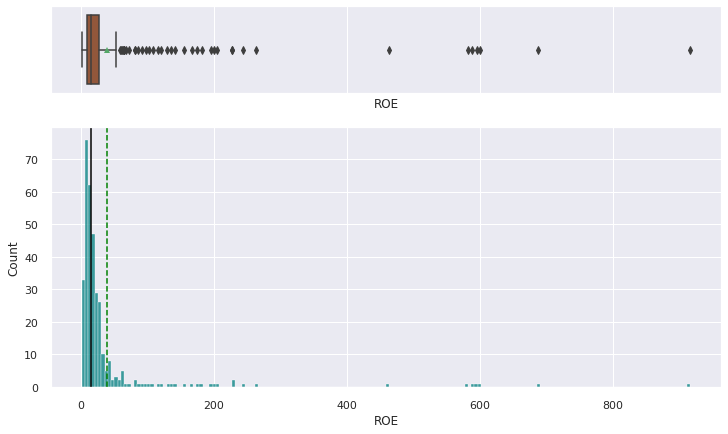

In [ ]:
histogram_boxplot(df, "ROE")

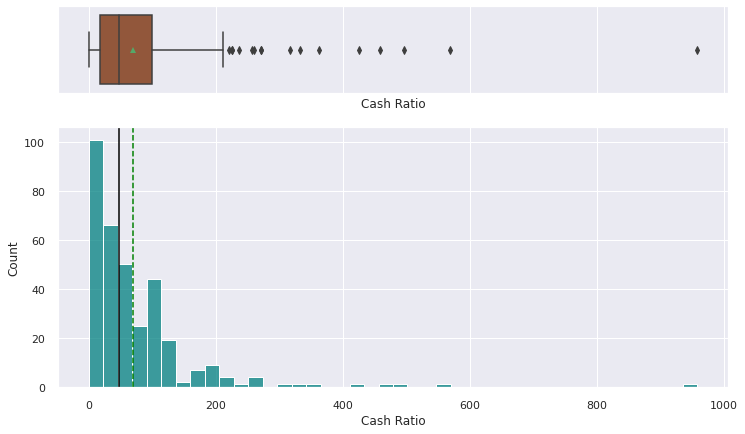

In [ ]:
histogram_boxplot(df, "Cash Ratio")

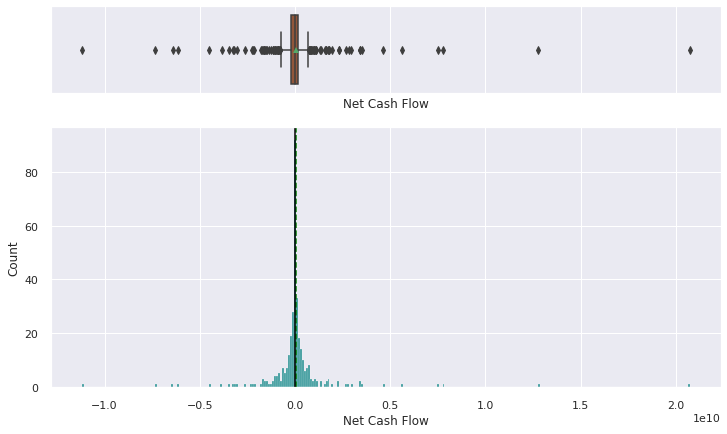

In [ ]:
histogram_boxplot(df, "Net Cash Flow")

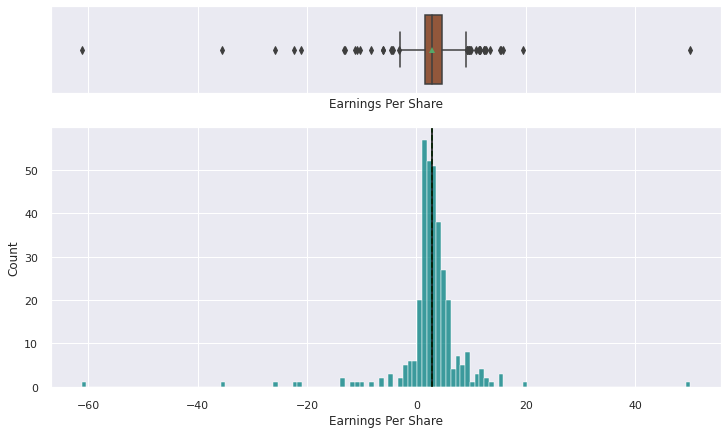

In [ ]:
histogram_boxplot(df, "Earnings Per Share")

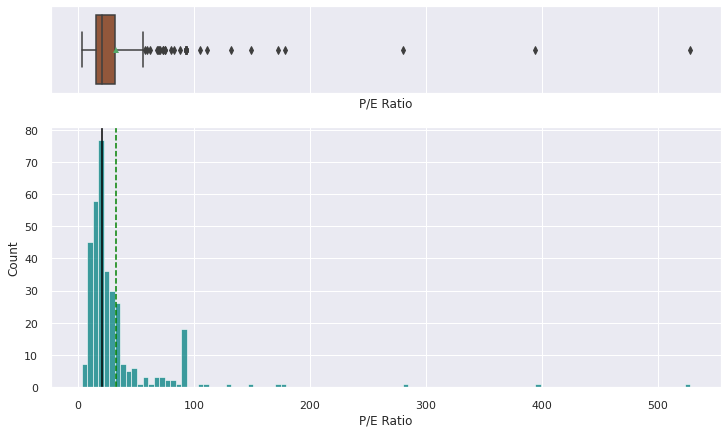

In [ ]:
histogram_boxplot(df, "P/E Ratio")

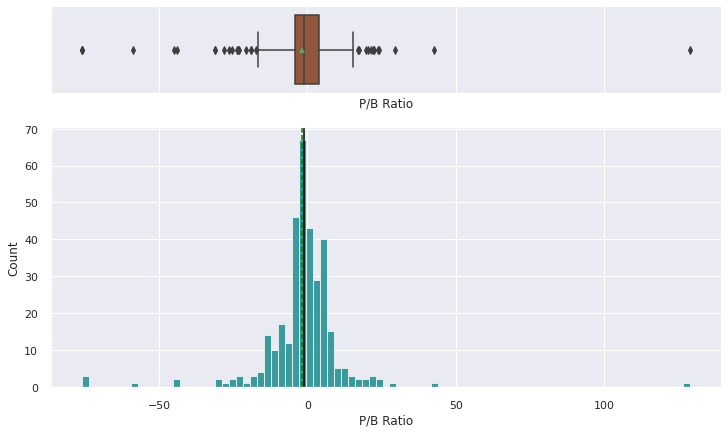

In [ ]:
histogram_boxplot(df, "P/B Ratio")

####Sector

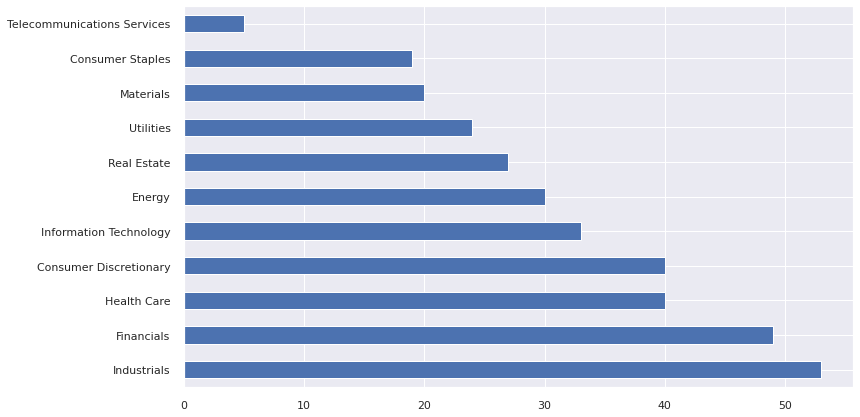

In [ ]:
plt.figure(figsize=(12,7))
(df["GICS Sector"]
 .value_counts()
 .plot.barh()
)

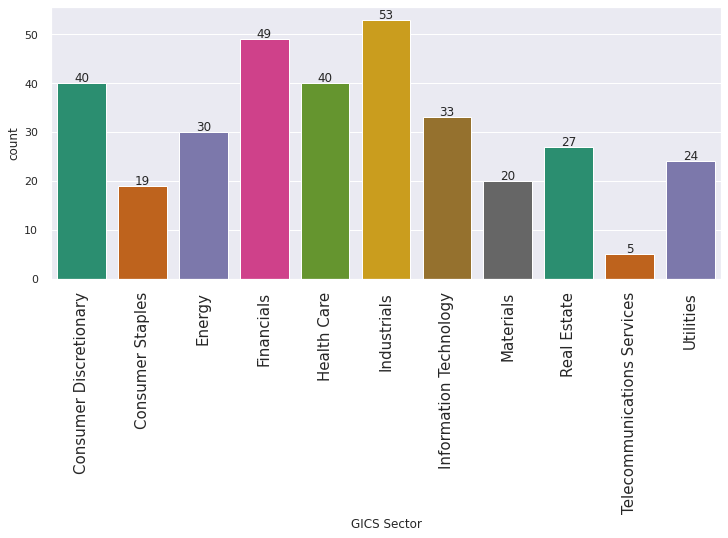

In [ ]:
labeled_barplot(df, "GICS Sector")

In [ ]:
df["GICS Sector"].value_counts()

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

In [ ]:
df["GICS Sector"].value_counts(normalize=True)

Industrials                    0.155882
Financials                     0.144118
Health Care                    0.117647
Consumer Discretionary         0.117647
Information Technology         0.097059
Energy                         0.088235
Real Estate                    0.079412
Utilities                      0.070588
Materials                      0.058824
Consumer Staples               0.055882
Telecommunications Services    0.014706
Name: GICS Sector, dtype: float64

####Sub Industry

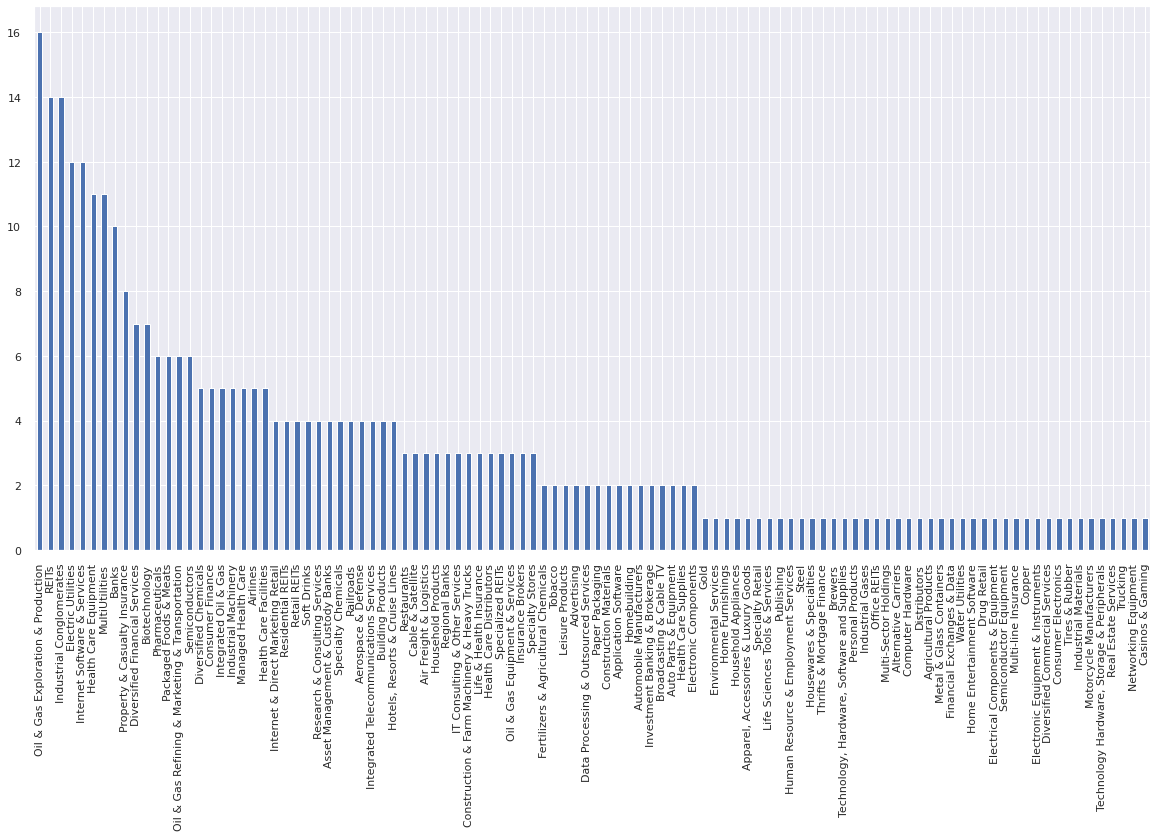

In [ ]:
plt.figure(figsize=(20,10))
(df["GICS Sub Industry"]
 .value_counts()
 .plot.bar())

In [ ]:
df["GICS Sub Industry"].value_counts()

Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Diversified Chemicals                               5
Consumer Finance                                    5
Integrated Oil & Gas                                5
Industrial Machinery        

In [ ]:
df["GICS Sub Industry"].value_counts(normalize=True)

Oil & Gas Exploration & Production                 0.047059
REITs                                              0.041176
Industrial Conglomerates                           0.041176
Electric Utilities                                 0.035294
Internet Software & Services                       0.035294
Health Care Equipment                              0.032353
MultiUtilities                                     0.032353
Banks                                              0.029412
Property & Casualty Insurance                      0.023529
Diversified Financial Services                     0.020588
Biotechnology                                      0.020588
Pharmaceuticals                                    0.017647
Packaged Foods & Meats                             0.017647
Oil & Gas Refining & Marketing & Transportation    0.017647
Semiconductors                                     0.017647
Diversified Chemicals                              0.014706
Consumer Finance                        

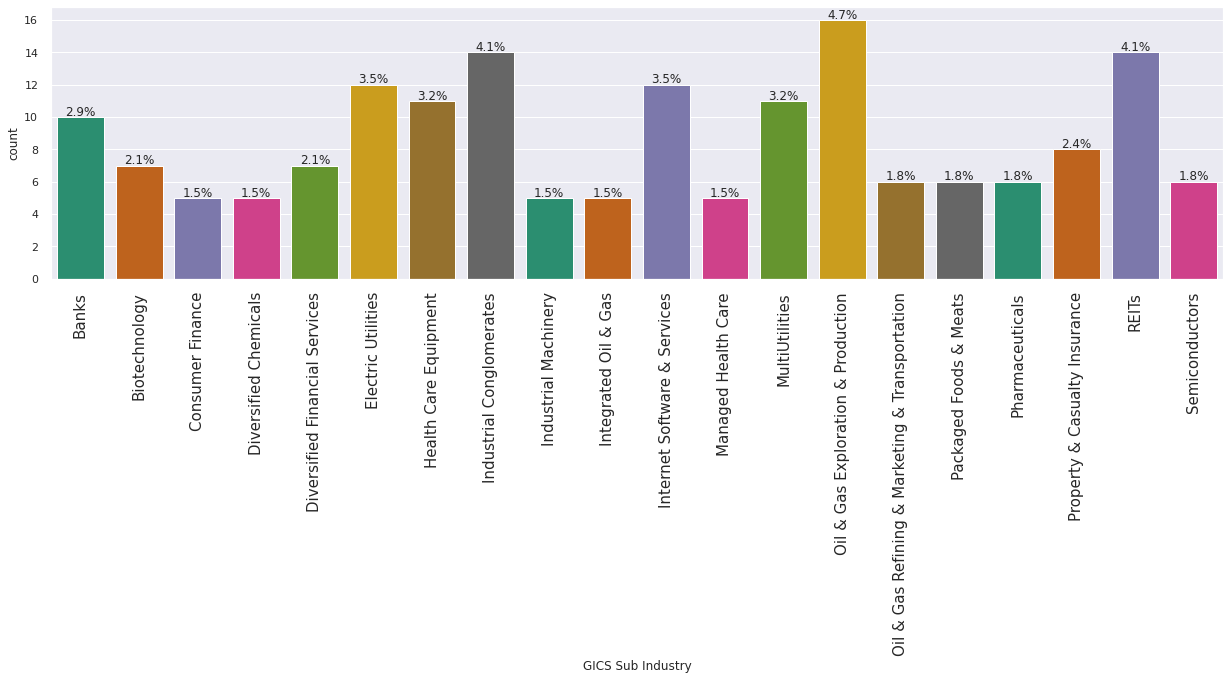

In [ ]:
labeled_barplot(data, "GICS Sub Industry", perc=True, n=20)

###Bivariate Analysis

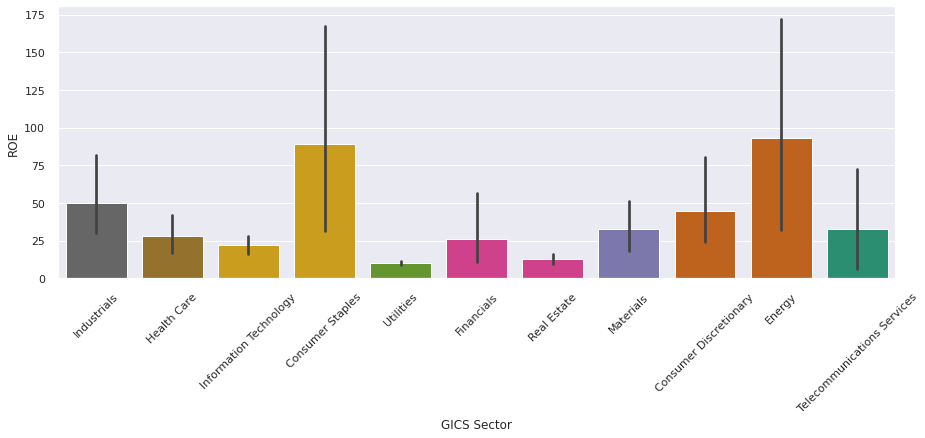

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(data['GICS Sector'],data['ROE'], palette="Dark2_r")
plt.show()

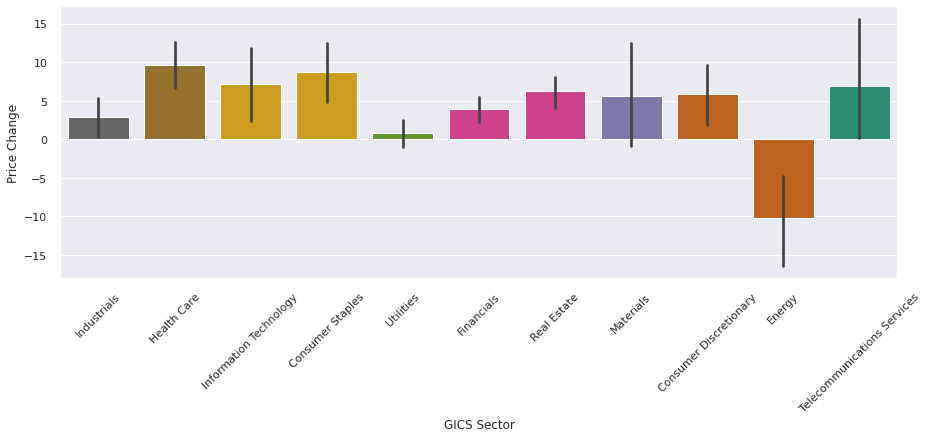

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(data['GICS Sector'],data['Price Change'], palette="Dark2_r")
plt.show()

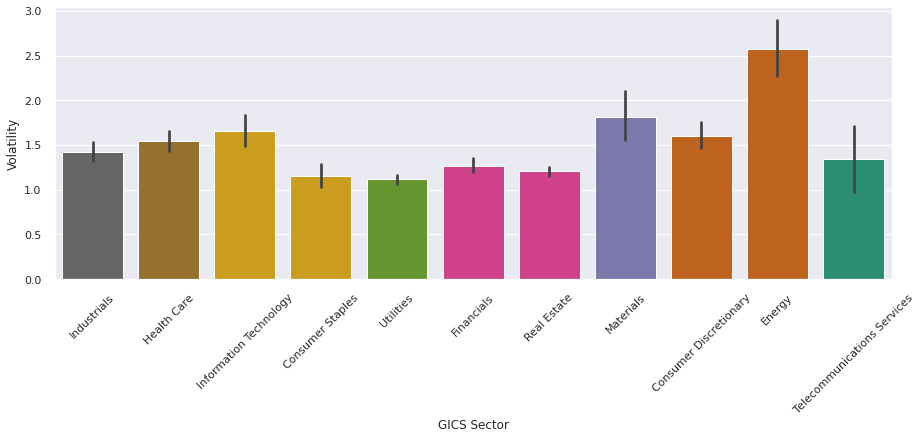

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(data['GICS Sector'],data['Volatility'], palette="Dark2_r")
plt.show()

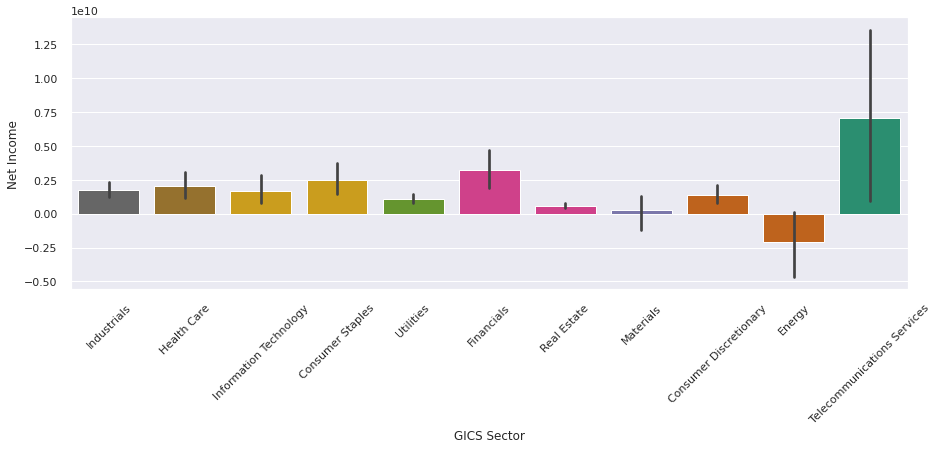

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(data['GICS Sector'],data['Net Income'], palette="Dark2_r")
plt.show()

####Observations

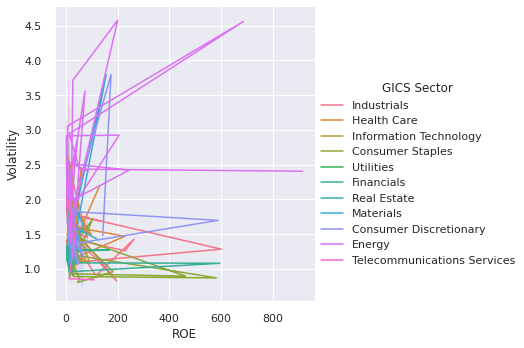

In [ ]:
market = pd.read_csv("/content/drive/MyDrive/Project8/stock_data.csv")
sns.relplot(
    data=market, kind="line",
    x="ROE", y="Volatility", hue="GICS Sector",
    sort=False
)

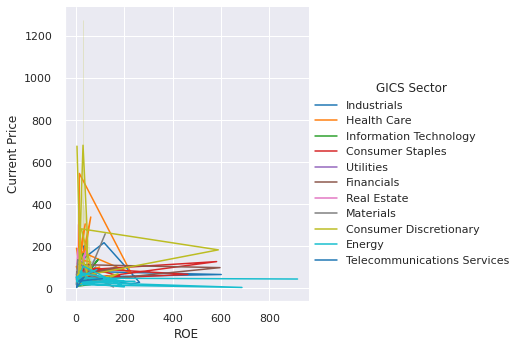

In [ ]:
market = pd.read_csv("/content/drive/MyDrive/Project8/stock_data.csv")
sns.relplot(
    data=market, kind="line",
    x="ROE", y="Current Price", hue="GICS Sector",
    sort=False, palette="tab10"
)

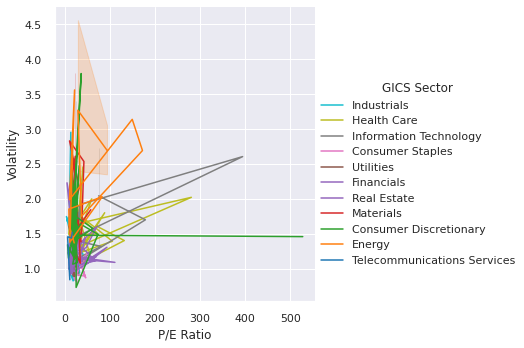

In [ ]:
market = pd.read_csv("/content/drive/MyDrive/Project8/stock_data.csv")
sns.relplot(
    data=market, kind="line",
    x="P/E Ratio", y="Volatility", hue="GICS Sector",
    sort=False, palette="tab10_r"
)

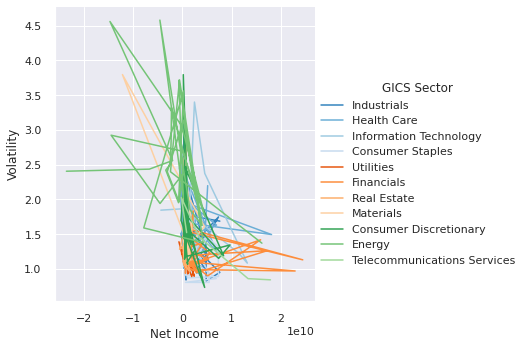

In [ ]:
market = pd.read_csv("/content/drive/MyDrive/Project8/stock_data.csv")
sns.relplot(
    data=market, kind="line",
    x="Net Income", y="Volatility", hue="GICS Sector",
    sort=False, palette="tab20c"
)

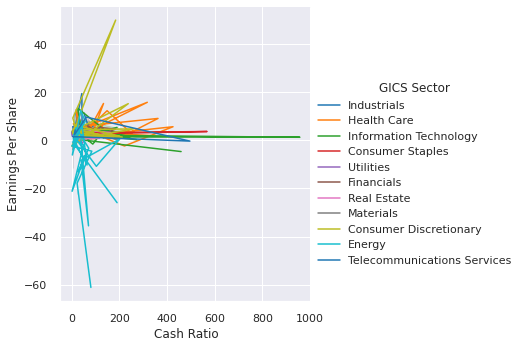

In [ ]:
market = pd.read_csv("/content/drive/MyDrive/Project8/stock_data.csv")
sns.relplot(
    data=market, kind="line",
    x="Cash Ratio", y="Earnings Per Share", hue="GICS Sector",
    sort=False, palette="tab10"
)

## Outlier Detection

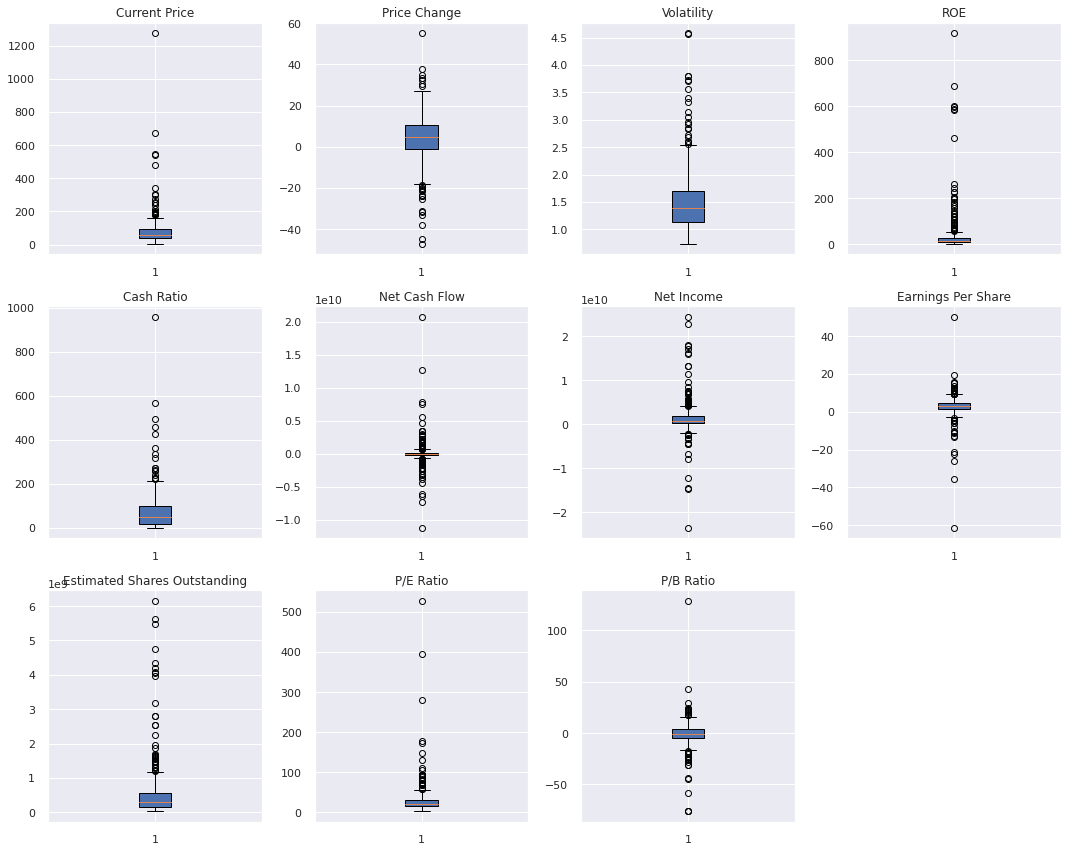

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], patch_artist=True, whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

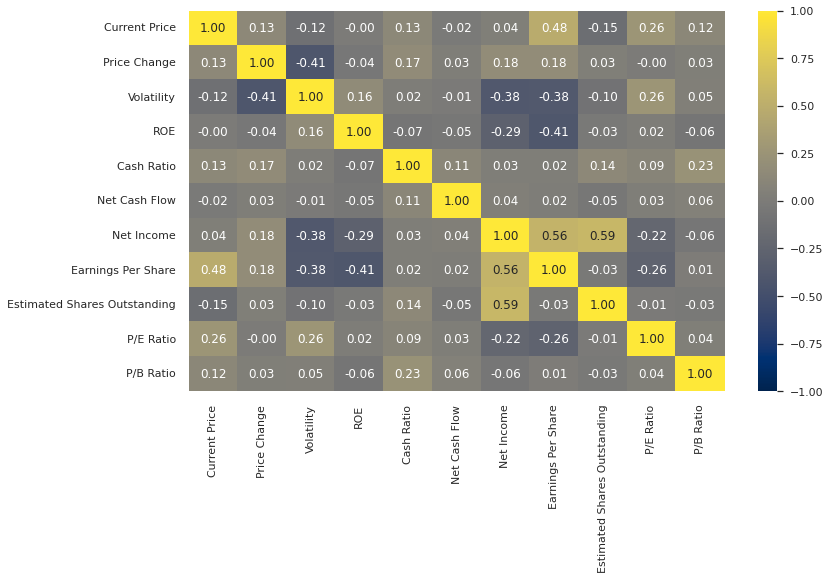

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(
    data.corr(), vmin=-1, vmax=1, annot=True, fmt="0.2f", cmap="cividis"
)

Observations:

*   There is moderate correlation among all variables.
*   EPS and Estimated Shares Outstanding has the highest correlation with Net Income, showing a correlation of 0.56 and 0.59.
*   Current Price and and EPS also show a moderate correlation of 0.48





###Scaling the data

In [ ]:
#scaling data before clustering
SC = StandardScaler()
subset = data[numeric_columns].copy() #all numeric columns
subset_scaled = SC.fit_transform(subset)

subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns) #dataframe of subset data

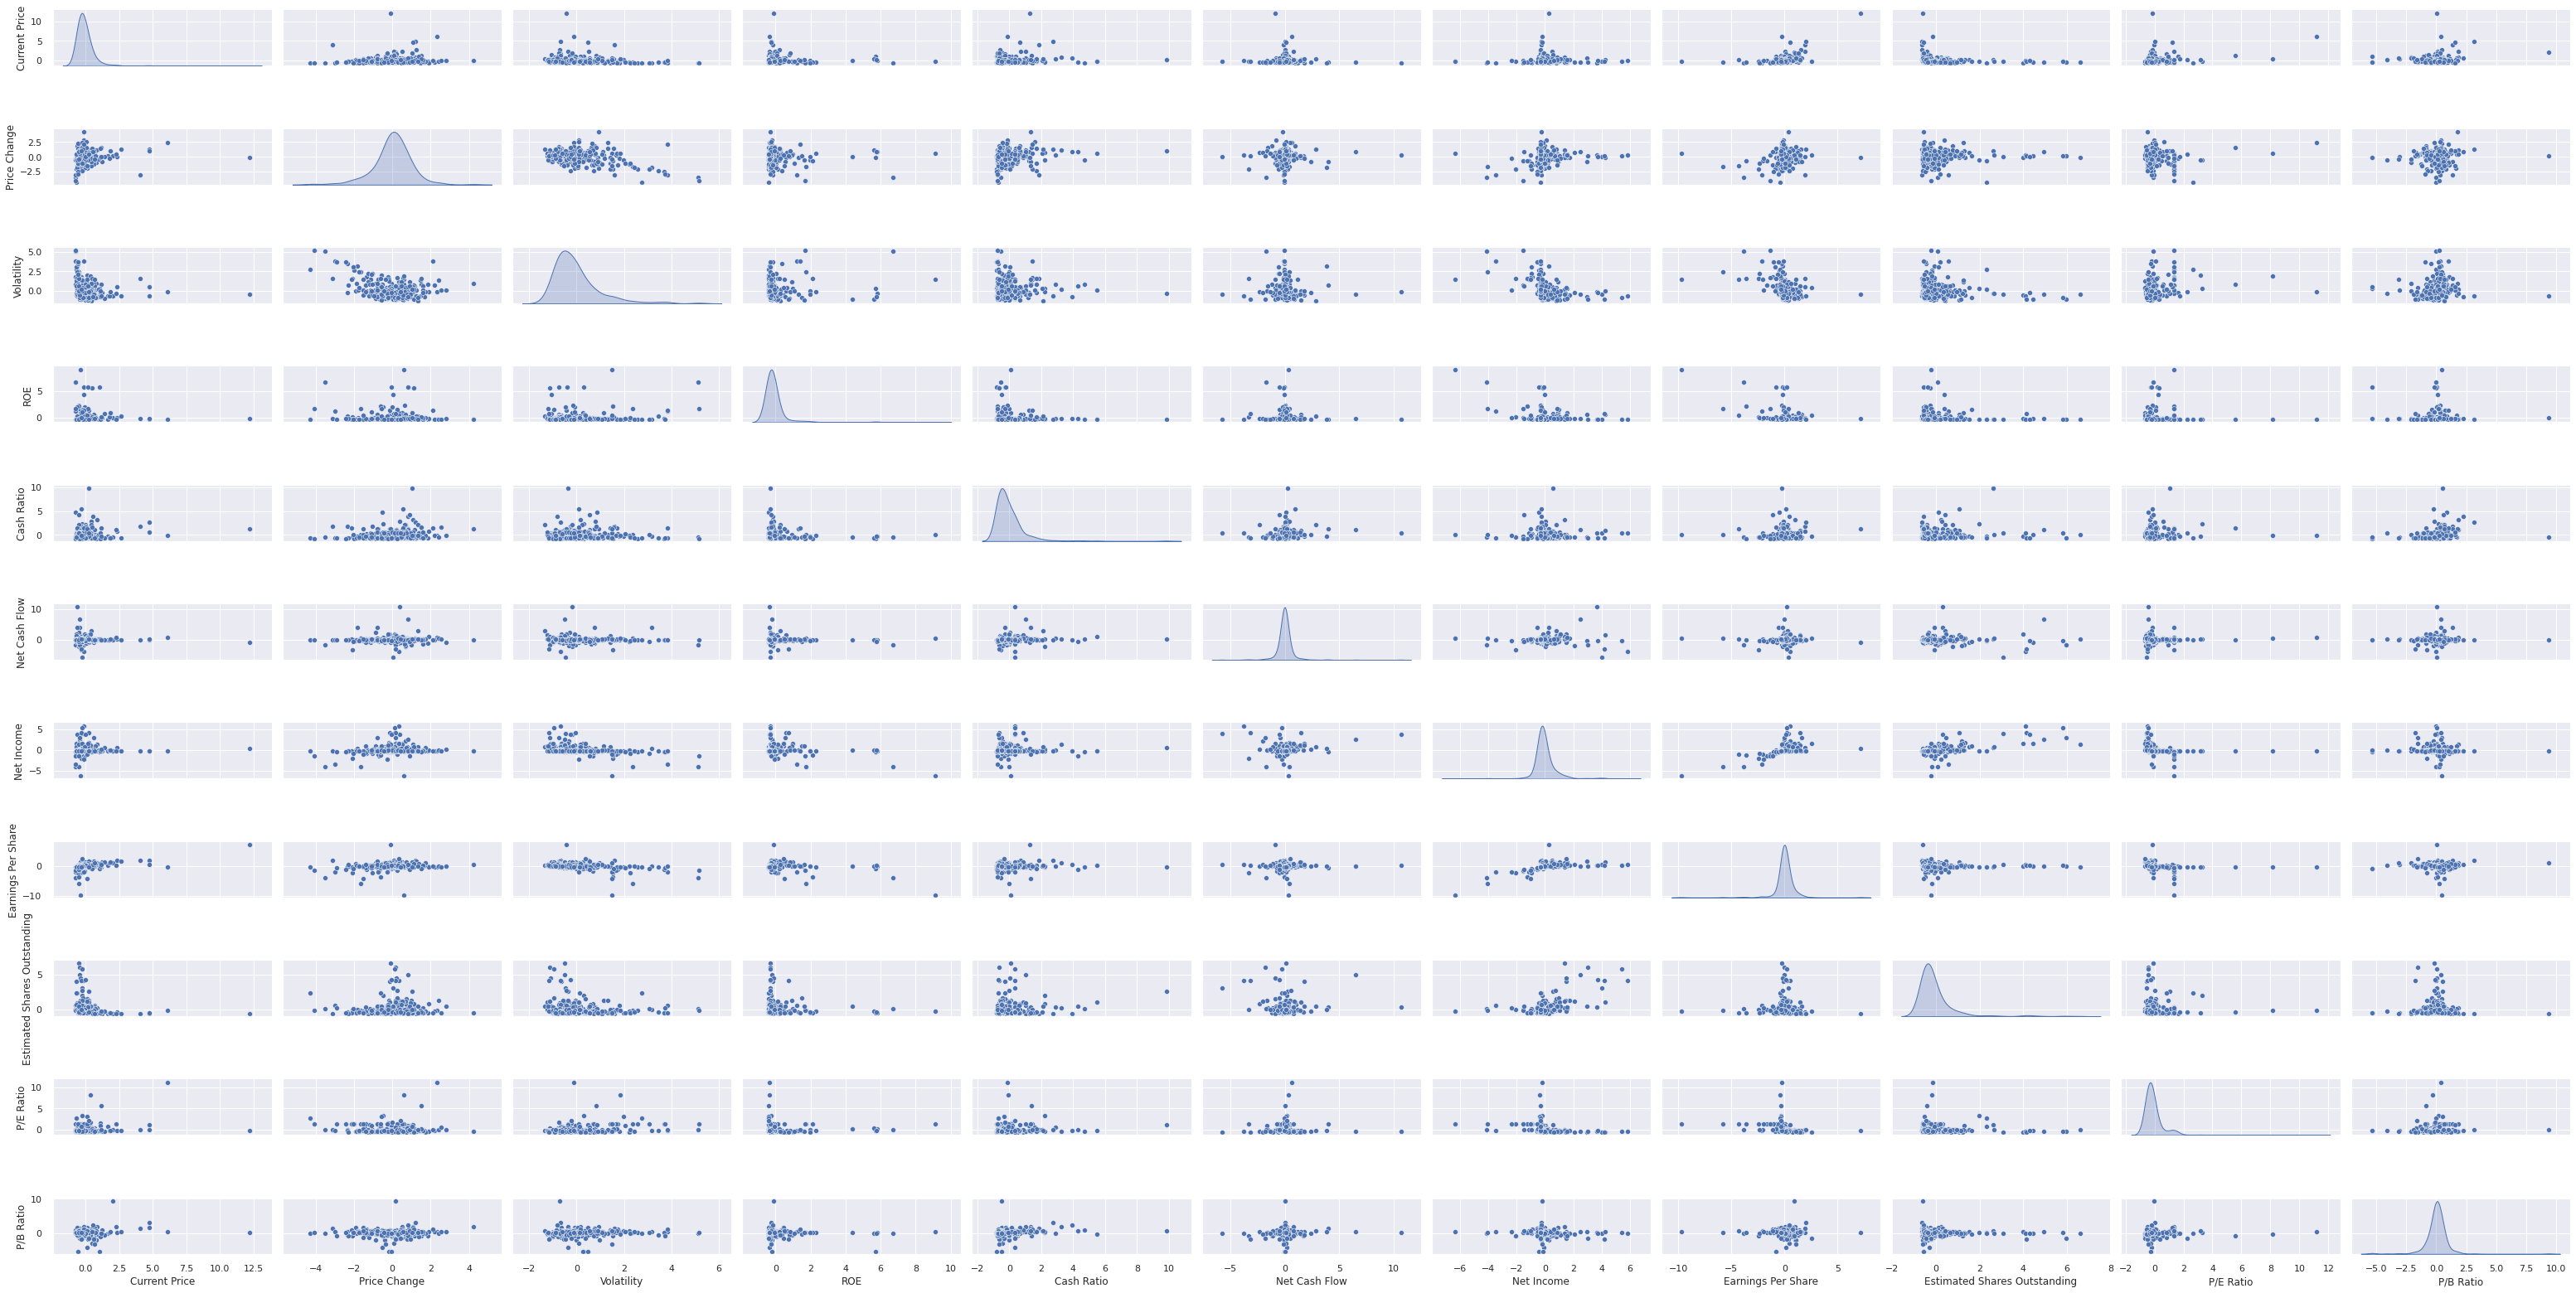

In [ ]:
#create pairplot for scaled dataframe
sns.pairplot(subset_scaled_df, height=2,aspect=2 , diag_kind='kde')
plt.show()

## K-means Clustering

In [ ]:
k_means = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.267596864267437
Number of Clusters: 4 	Average Distortion: 2.176396791566185
Number of Clusters: 5 	Average Distortion: 2.1141491283870315
Number of Clusters: 6 	Average Distortion: 2.0753860038048044
Number of Clusters: 7 	Average Distortion: 2.0053307753950587
Number of Clusters: 8 	Average Distortion: 1.9689252919385614
Number of Clusters: 9 	Average Distortion: 1.9386308013544113
Number of Clusters: 10 	Average Distortion: 1.9041791139471302


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

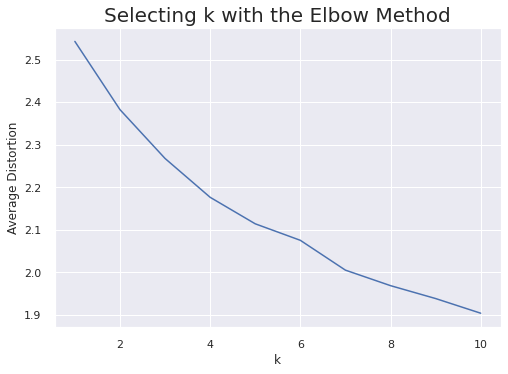

In [ ]:
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

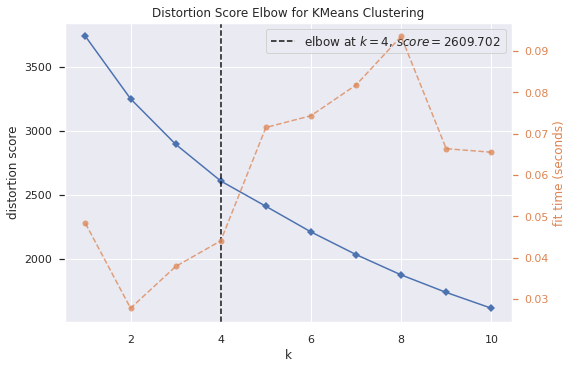

In [ ]:
#fitting the data to visualizer and then render figure
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,11), timings=True)
visualizer.fit(k_means)
visualizer.show()

####**Silhouette Scores**

For n_clusters = 2, silhouette score is 0.44600165785164264
For n_clusters = 3, silhouette score is 0.4316799028589096
For n_clusters = 4, silhouette score is 0.4524477668631469
For n_clusters = 5, silhouette score is 0.4103654981201704
For n_clusters = 6, silhouette score is 0.39136108754894705
For n_clusters = 7, silhouette score is 0.38105087369742097
For n_clusters = 8, silhouette score is 0.41476612263987034
For n_clusters = 9, silhouette score is 0.23152571674628303
For n_clusters = 10, silhouette score is 0.1793062021482546


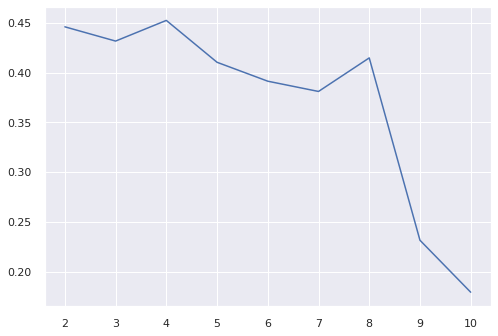

In [ ]:
sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

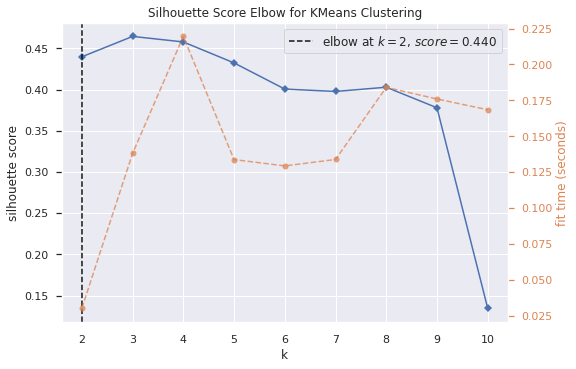

In [ ]:
#fitting Kmeans and using visualizer to find the optimal k vlaue
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

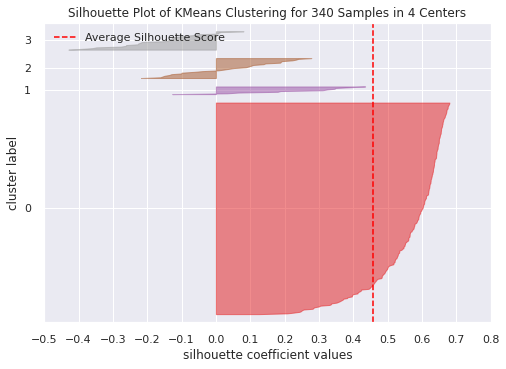

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

In [ ]:
#creating kmeans cluster model
kmeans = KMeans(n_clusters=4, random_state=1)

#fit model to scaled dataset
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

####Cluster Profiling

In [ ]:
data["K_means_segments"] = kmeans.labels_

In [ ]:
#group by kmeans cluster labels
cluster_profile = data.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Current Price"].count().values
)

In [ ]:
#display cluster profiles
cluster_profile.style.highlight_max(color="darkgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [ ]:
#companies by cluister
for c in data["K_means_segments"].unique():
  print('In cluster {}, the following companies are:'.format(c))
  print(data[data["K_means_segments"] == c]["Security"].unique().tolist())
  print()

In cluster 0, the following companies are:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Allegion', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar Inc.', 'Chubb Limited', 'CB

In [ ]:
#companies by stock/sector
for c in range(0, data["K_means_segments"].nunique()):
  print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
  print(data[data["K_means_segments"] == c]["GICS Sector"].value_counts())
  print("-"*50)

The number of stocks within each GICS Sector for Cluster 10 are:
Industrials                    52
Financials                     45
Consumer Discretionary         33
Health Care                    29
Real Estate                    26
Information Technology         24
Utilities                      24
Materials                      19
Consumer Staples               17
Energy                          6
Telecommunications Services     2
Name: GICS Sector, dtype: int64
--------------------------------------------------
The number of stocks within each GICS Sector for Cluster 10 are:
Financials                     3
Health Care                    2
Telecommunications Services    2
Consumer Discretionary         1
Information Technology         1
Consumer Staples               1
Energy                         1
Name: GICS Sector, dtype: int64
--------------------------------------------------
The number of stocks within each GICS Sector for Cluster 10 are:
Energy                    22
Infor

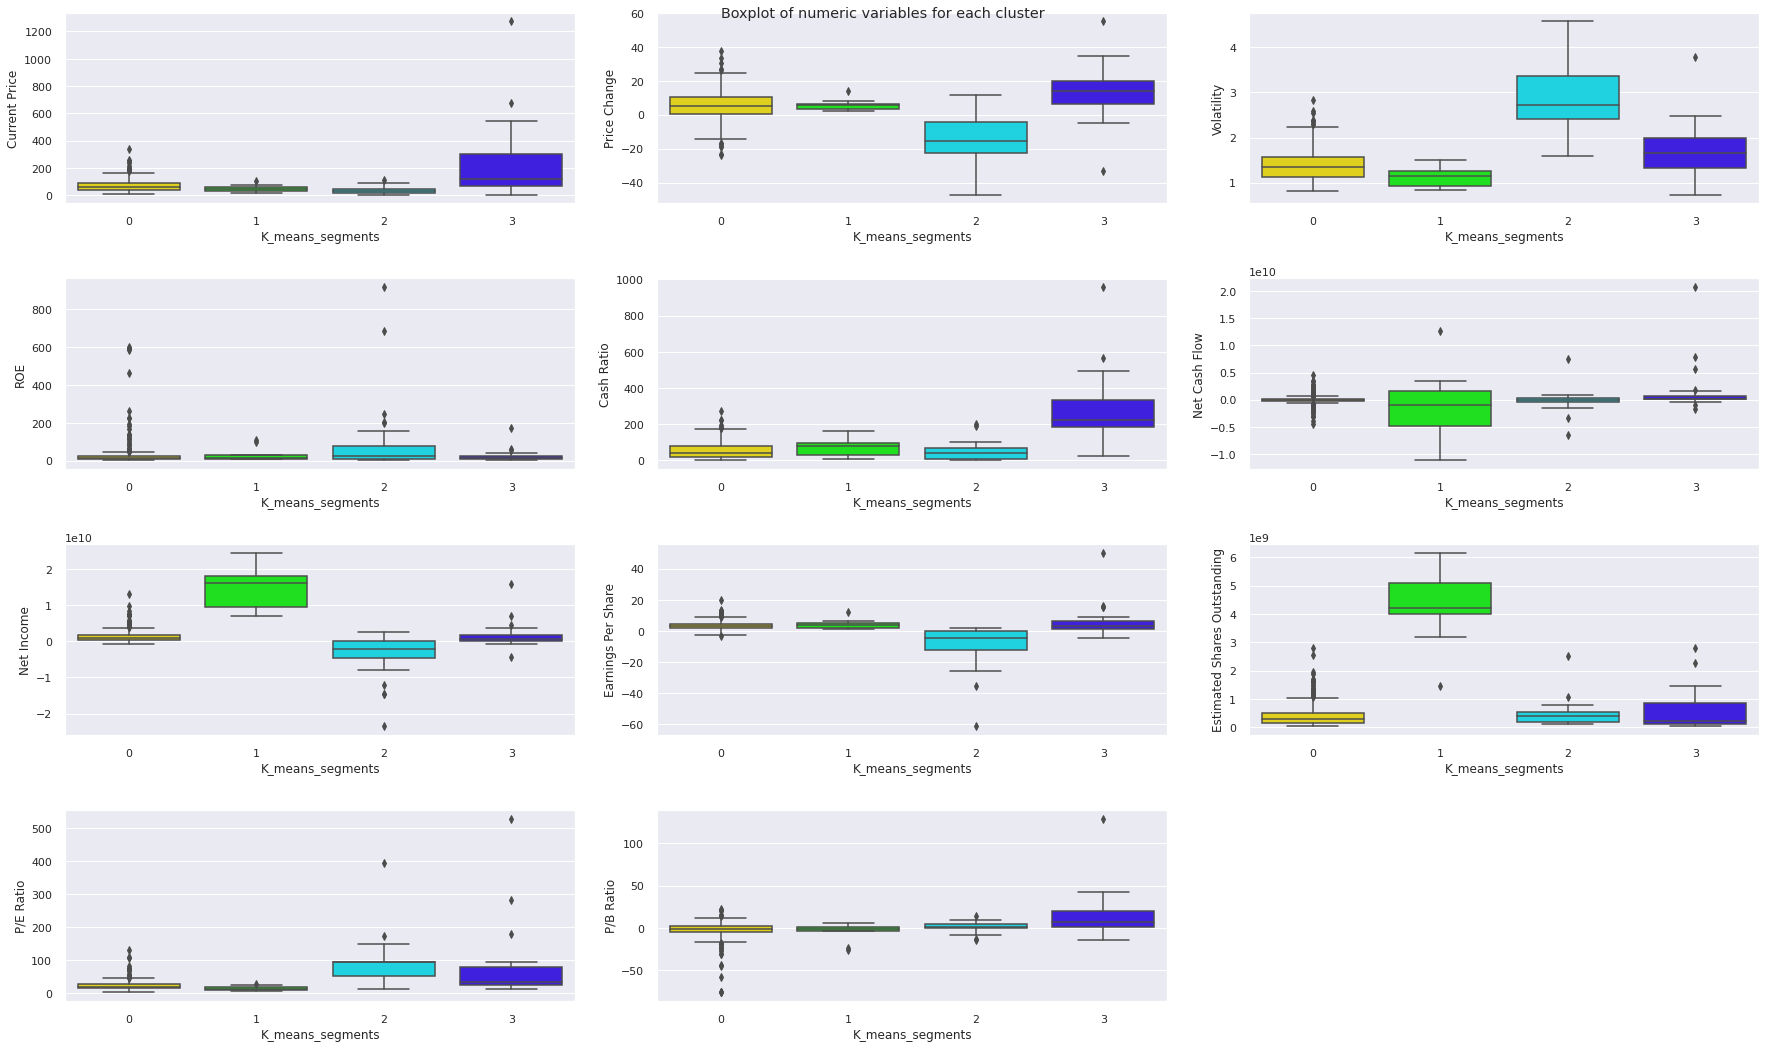

In [ ]:
plt.figure(figsize=(25,15))
plt.suptitle("Boxplot of numeric variables for each cluster")

for i, variable in enumerate(numeric_columns):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(data=data, x="K_means_segments", y=variable, palette="gist_rainbow")

plt.tight_layout(pad=2.0)

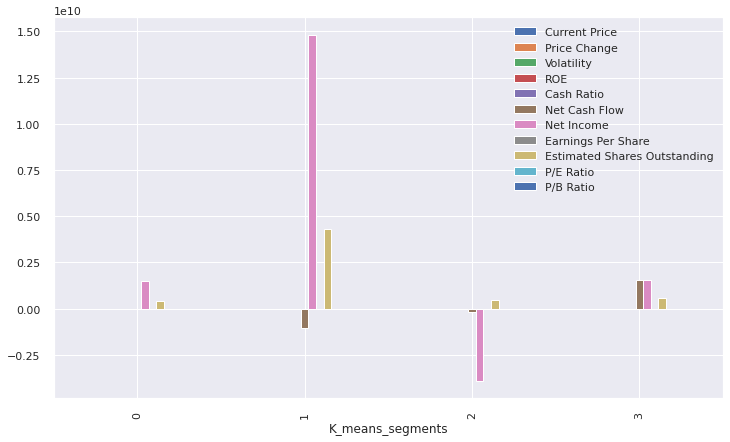

In [ ]:
data.groupby("K_means_segments").mean().plot.bar(figsize=(12,7))  #

####KMeans Observations

**Cluster 0**
* Some of the company names for the Cluster 0 are Adobe, American Airlines, American Express, Procter & Gamble, Illinois Tool Works.
* Most of these companies have high net incomes and low volatility.  
* They can be categorized as Large-Cap, Growth type companies
* The majority of these companies are from the Airlines, Financials, and Consumer sectors.

**Cluster 1**
*   Cluster 1 is made up of 11 stocks, which are mostly from the IT and the Financial sectors.
*   These companies have high net income and estimated shares outstanding.
*   They also have a low P/E ratio and ROE.

**Cluster 2**
*   Cluster 2 is compromised of 27 stocks, most of which are Energy stocks.
*   These stocks have low stock prices, a high ROE, but a negative net income.
*   These stocks seem to be the most volatile, high-risk type stocks

**Cluster 3**
*   Cluster 3 is comprised of 25 stocks, most of which are from consumer, IT, Pharmaceuticals, and IT stocks.
*   It has the highest EPS, Cash Flow and highest Price Change.
*   It is the only cluster with a positive Net Cash Flow.












## Hierarchical Clustering

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, obtained with Euclidean distance and average linkage.


In [ ]:
# list of linkage methods for euclidean distance metric
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print(
            "Cophenetic correlation for Euclidean distance and {} linkage is {}.".format(
                lm, round(c,4)
            )
        )
    print(" ")
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232.
 
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873.
 
Cophenetic correlation for Euclidean distance and average linkage is 0.9423.
 
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9314.
 
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101.
 
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8694.
 


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


###**Dendograms**

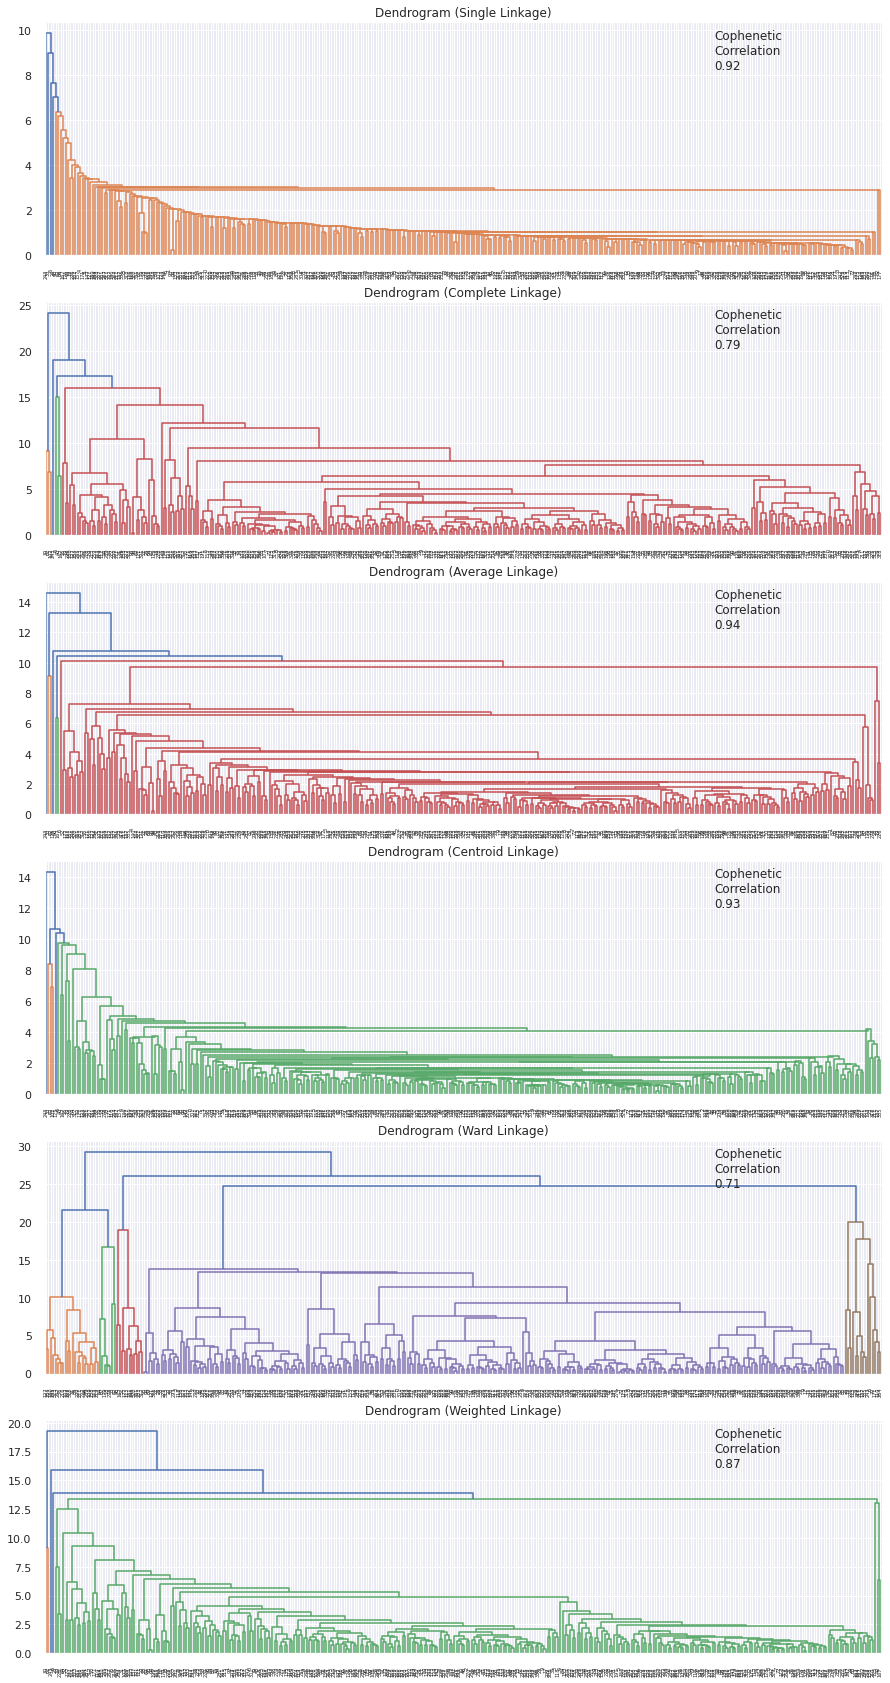

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [ ]:
Z = linkage(subset_scaled_df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z, pdist(subset_scaled_df))


In [ ]:
hierarchy = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
hierarchy.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

####Cluster Profiling

In [ ]:
data_harchy = data.copy()
data_harchy.drop("K_means_segments", axis=1, inplace=True)
data_harchy["HCclusters"] = hierarchy.labels_

In [ ]:
#grouping by cluster
cluster_hierarchy_profile = data_harchy.groupby("HCclusters").mean()

#counts for number of stocks in each cluster
cluster_hierarchy_profile["Count"] = (
    data_harchy.groupby("HCclusters")["Current Price"].count().values
)

#show df with max values for each metric highlighted green
cluster_hierarchy_profile.style.highlight_max(color="darkblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
HCclusters,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1


In [ ]:
for c in data_harchy["HCclusters"].unique():
    print("In cluster {}, the following companies are present:".format(c))
    print(data_harchy[data_harchy["HCclusters"] == c]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [ ]:
for k in range(0, data_harchy['HCclusters'].nunique()):
  print("The number of stocks within each cluster are:")
  print(data_harchy[data_harchy['HCclusters'] == k]['GICS Sector'].value_counts())

The number of stocks within each cluster are:
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         39
Information Technology         32
Energy                         28
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64
The number of stocks within each cluster are:
Consumer Discretionary    1
Name: GICS Sector, dtype: int64
The number of stocks within each cluster are:
Energy    2
Name: GICS Sector, dtype: int64
The number of stocks within each cluster are:
Information Technology    1
Name: GICS Sector, dtype: int64


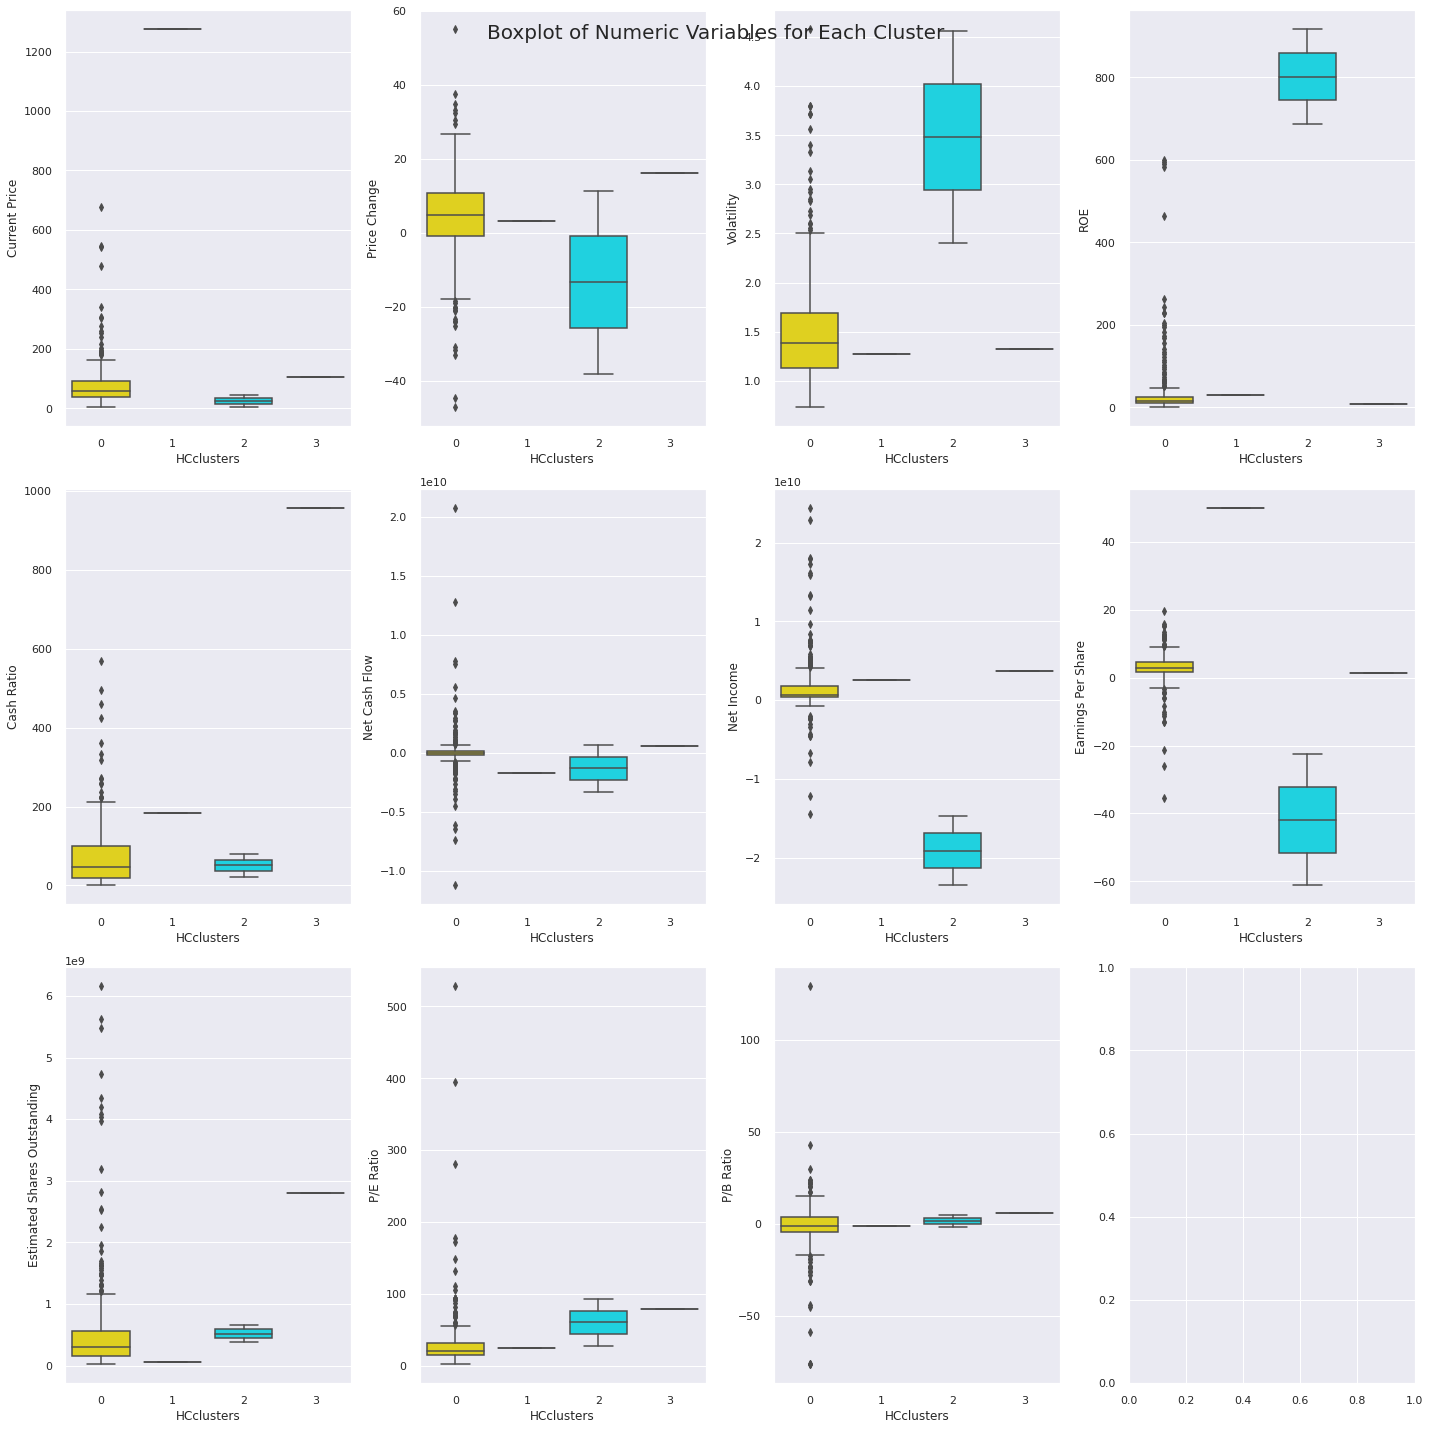

In [ ]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 20))
fig.suptitle('Boxplot of Numeric Variables for Each Cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=data_harchy[numeric_columns[counter]],x=data_harchy['HCclusters'],palette="gist_rainbow")
        counter = counter+1

fig.tight_layout(pad=1.0)

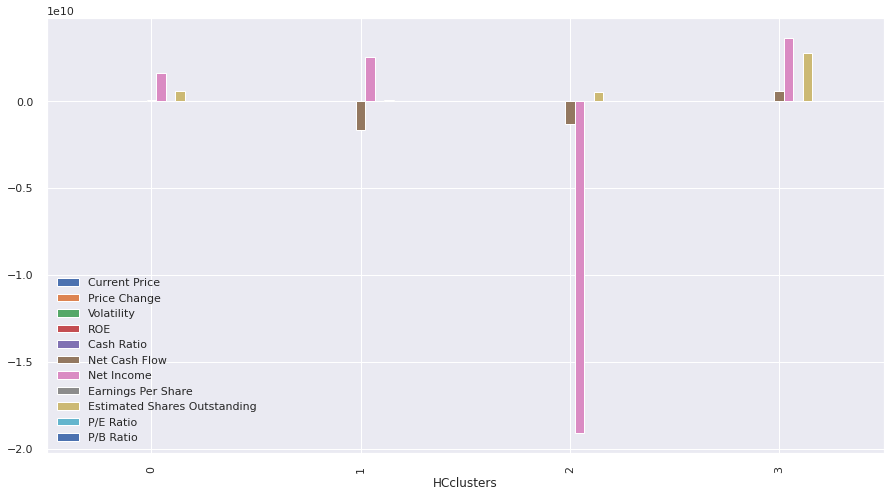

In [ ]:
data_harchy.groupby("HCclusters").mean().plot.bar(figsize=(15,8))

**Cluster Analysis--Hierarchal**
*   Cluster 0 is comprised of almost every company.  It has 336 out of 340 companies.
*   Cluster 1 is made up of 1 company which is Priceline.com
*   Cluster 2 is made up of Apache Corporation and Chesapeake Energy.
*   Cluster 3 is made up of one company--Facebook.

* When comparing the Dendograms, average linkage has the highest cophenetic value of 0.94, followed by the Centroid linkage with 0.93.  
* Cluster 2 performed the worse overall, having a very high negative Net Income.
* Cluster 3 was the best overall performer, having the highest net income and also the highest shares outstanding meaning they are continuing to grow.  



## K-means vs Hierarchical Clustering

You compare several things, like:
1. Which clustering technique took less time for execution?
2. Which clustering technique gave you more distinct clusters, or are they the same?
3. How many observations are there in the similar clusters of both algorithms?
4. How many clusters are obtained as the appropriate number of clusters from both algorithms?


1) The models both took less than 1 minute to define the clusters.

2) Both models gave the same amount of clusters wuth 4 clusters each.

3) Kmeans provided more stock sector categories, while Hierarchial had a higher concentration of specific stock sectors.  

4) Both KMeans and Hierarchial produced the same or similar clusters based on the 11 variables in the dataset.

## Actionable Insights and Recommendations

- The company should consider classifying/categorizing the distinct clusters to produce different investment portfolio strategies.  The results could be used as a tool to help pick how aggressive or conservative a customer would like to invest.  
- The results would also be a good way of picking stocks for long-term growth or short-term financial goals.  
- The clusters could also be used in tandem with other bank products to further diversify a customer's portfolio.

In [ ]:
%%shell
jupyter nbconvert --to html /content/WalterEfird_FullCode+.ipynb

[NbConvertApp] Converting notebook /content/WalterEfird_FullCode+.ipynb to html
[NbConvertApp] Writing 3085880 bytes to /content/WalterEfird_FullCode+.html
